<a href="https://colab.research.google.com/github/hsnam95/class2021Fall/blob/main/crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 크롤링

<여는태그>내용</닫는태그>  
<여는태그 속성명="속성값">내용</닫는태그>  
<여는태그 속성명="속성값" />

html: 전체 html 문서를 감싸는 태그입니다. 하나만 존재해야 하고 html 바깥에 DOCTYPE을 제외한 다른 태그가 있으면 안 됩니다.  
head: html 문서에 대한 정보를 나타내는 부분입니다. 하나만 존재해야 하고, html 바로 아래에 있어야합니다.  
body: html 문서에서 실제적으로 보여지는 부분을 나타냅니다. 하나만 존재해야 하고, html 바로 아래, head 다음에 위치해야 합니다.  
title: head 안에 들어가는 태그로 제목표시줄의 내용을 나타냅니다.  
meta: 문서에 대한 설명을 표시합니다. 사람에게는 보이지 않고, 브라우저만 읽을 수 있습니다. 속성으로 charset="utf-8"이라고 한 것은 브라우저에게 한글인코딩을 UTF-8로 설정하라고 알린 겁니다. 이 부분이 있어야 한글이 깨지지 않습니다.  
h1: body 안에서 제목을 표시하는 태그입니다. 중요도에 따라 h1부터 h2, h3, ..., h6까지 있습니다.  
div: 구역을 표시하는 태그입니다. 눈에 보이지는 않지만 p와 img 태그를 하나의 구역으로 묶었습니다.  
p: 문단을 표시하는 태그입니다. 여기 안에 글의 내용을 넣으면 됩니다.  
img: 이미지를 표시하는 태그입니다. 아까 src라는 속성이 있었는데 src는 이미지 파일의 경로(위치)를 지정하는 속성입니다.  
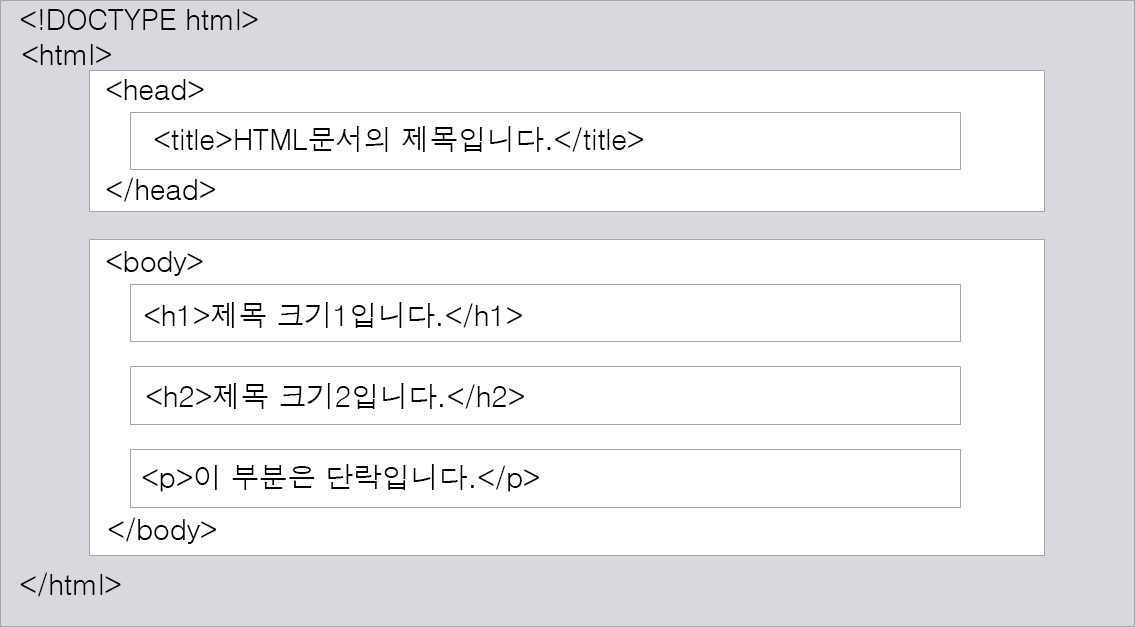

In [9]:
# _*_ coding: UTF-8 _*_
from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv

### 웹문서 전체를 가져오기

In [ ]:
bsObject = BeautifulSoup(urlopen("http://www.naver.com"), "html.parser")

In [ ]:
bsObject.html

### head 가져오기

In [ ]:
bsObject.head

### title 가져오기

In [24]:
bsObject.head.title

<title>NAVER</title>

In [23]:
bsObject.head.title.get_text()  # bsObject.head.title.text.strip()

'NAVER'

### meta 데이터 가져오기

In [ ]:
bsObject.head.find_all('meta')

### meta 데이터의 모든 content 가져오기

In [ ]:
for meta in bsObject.head.find_all('meta'):
    print(meta.get('content'))

### meta 데이터 중 원하는 tag 가져오기

In [ ]:
bsObject.head.find("meta", {"name":"description"})

In [ ]:
bsObject.head.find("meta", {"name":"description"}).get('content')

In [ ]:
bsObject.head.find("meta", {"content":"네이버"}).get('property')

### 모든 링크의 텍스트와 주소 가져오기

In [ ]:
for link in bsObject.find_all('a'):
    print(link.get_text(), link.get('href'))

### 예제: 네이버 베스트셀러 주간 순위에 있는 책의 정보를 가져오기  
첫페이지에 있는 25권의 책목록에서 링크를 추출하여 각 추출된 링크로 접속하여 책이름, 저자, 가격 정보등을 출력

In [33]:
html = urlopen('https://book.naver.com/bestsell/bestseller_list.nhn')
bsObject = BeautifulSoup(html, "html.parser")

HTTPError: ignored

In [ ]:
bsObject

In [ ]:
for n in range(0,25):
    dt = bsObject.find("dt", {"id":"book_title_"+str(n)})
    title = dt.select('a')[0].get_text()
    author = dt.next_sibling.next_sibling.select('a')[0].get_text()
    publisher = dt.next_sibling.next_sibling.get_text().split()[-1]
    print(n+1, title, author, publisher)

In [ ]:
# Create a file to write to, add headers row
with open('crawling.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['rank', 'title', 'author', 'publisher'])
        
    for n in range(0,25):
        dt = bsObject.find("dt", {"id":"book_title_"+str(n)})
        title = dt.select('a')[0].get_text()
        author = dt.next_sibling.next_sibling.select('a')[0].get_text()
        publisher = dt.next_sibling.next_sibling.get_text().split()[-1]
        writer.writerow([n+1, title, author, publisher])